<a href="https://colab.research.google.com/github/byiringiroscar/NLP_FELLOWSHIP/blob/main/stable_diffusion_xl_1_0_inpainting_0_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers
!pip install transformers
!pip install accelerate

In [2]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

image = load_image(img_url).resize((1024, 1024))
mask_image = load_image(mask_url).resize((1024, 1024))

prompt = "a tiger sitting on a park bench"
generator = torch.Generator(device="cuda").manual_seed(0)

image = pipe(
  prompt=prompt,
  image=image,
  mask_image=mask_image,
  guidance_scale=8.0,
  num_inference_steps=20,  # steps between 15 and 30 work well for us
  strength=0.99,  # make sure to use `strength` below 1.0
  generator=generator,
).images[0]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/19 [00:00<?, ?it/s]

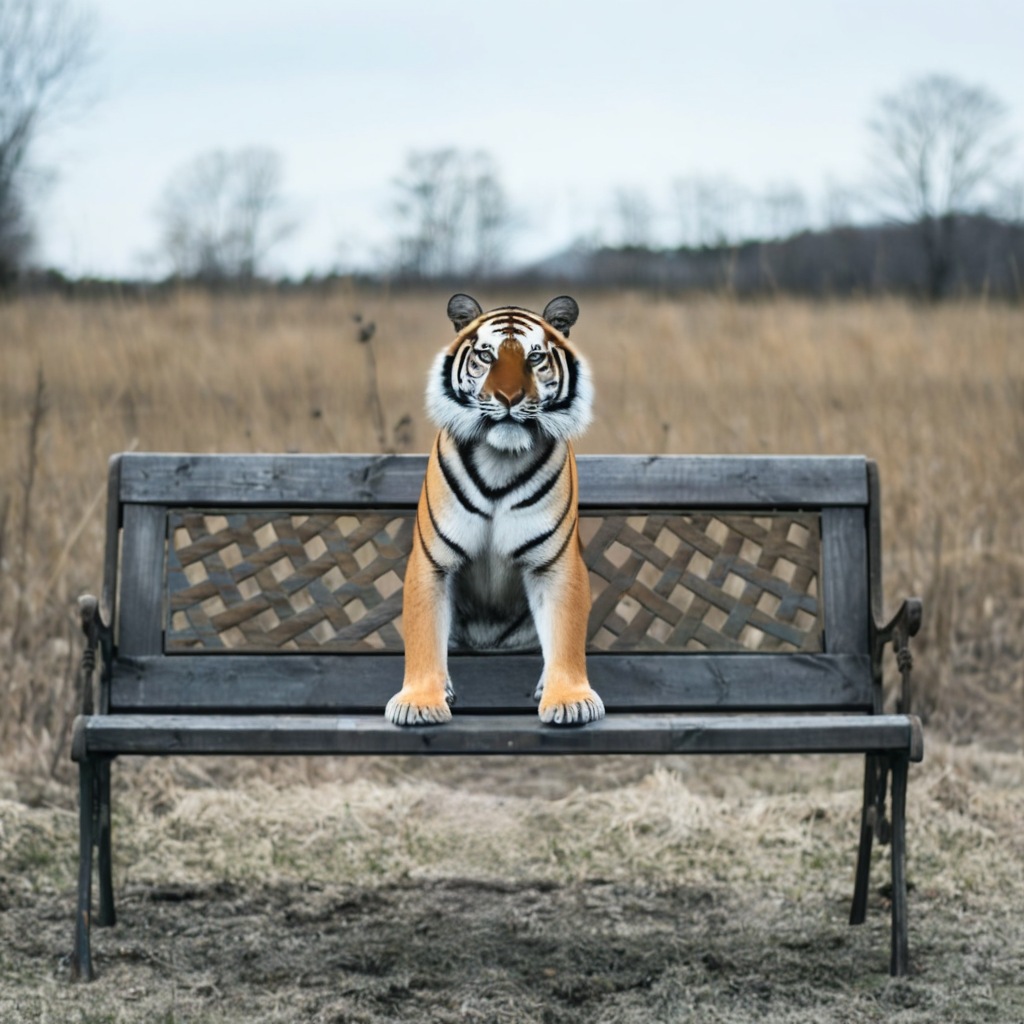

In [3]:
image